In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

### **Importing libraries**

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey = dete_survey.replace('Not Stated',np.nan)

In [6]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

In [7]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [8]:
dete_survey.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,822.0,NaN,NaN,NaN,411.693431,237.70582,1.0,206.25,411.5,616.75,823.0
SeparationType,822,9,Age Retirement,285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cease Date,788,24,2012,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DETE Start Date,749,50,2011,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role Start Date,724,45,2012,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,817,15,Teacher,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Classification,455,8,Primary,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,717,8,Metropolitan,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business Unit,126,14,Education Queensland,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Status,817,5,Permanent Full-time,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
tafe_survey.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Record ID,702.0,NaN,NaN,NaN,634602619806772736.0,251507062098475.09375,634133009996093952.0,634395439564804736.0,634583506367890432.0,634800514223046784.0,635073030973790976.0
Institute,702,12,Brisbane North Institute of TAFE,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WorkArea,702,2,Non-Delivery (corporate),432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CESSATION YEAR,695.0,NaN,NaN,NaN,2011.423022,0.905977,2009.0,2011.0,2011.0,2012.0,2013.0
Reason for ceasing employment,701,6,Resignation,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
CurrentAge. Current Age,596,9,56 or older,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employment Type. Employment Type,596,5,Permanent Full-time,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Classification. Classification,596,9,Administration (AO),293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LengthofServiceOverall. Overall Length of Service at Institute (in years),596,7,Less than 1 year,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dete_survey.info()
print("----------------------------------------------------------------------------")
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           788 non-null    object
 3   DETE Start Date                      749 non-null    object
 4   Role Start Date                      724 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               717 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [11]:
print("the len of dete columns",len(dete_survey.columns),",",
      "the len of tafe columns",len(tafe_survey.columns))

the len of dete columns 56 , the len of tafe columns 72


In [12]:
print("the total shape of dete data",dete_survey.shape,",",
      "the total shape of tafe data",tafe_survey.shape)

the total shape of dete data (822, 56) , the total shape of tafe data (702, 72)


In [13]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [14]:
print("After delete unnecessary features the total shape of dete data",
      dete_survey_updated.shape,",",
      "After delete unnecessary features the total shape of tafe data",
      tafe_survey_updated.shape)

After delete unnecessary features the total shape of dete data (822, 35) , After delete unnecessary features the total shape of tafe data (702, 23)


In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")

In [16]:
dete_survey_updated.columns , tafe_survey_updated.columns 

(Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
        'role_start_date', 'position', 'classification', 'region',
        'business_unit', 'employment_status', 'career_move_to_public_sector',
        'career_move_to_private_sector', 'interpersonal_conflicts',
        'job_dissatisfaction', 'dissatisfaction_with_the_department',
        'physical_work_environment', 'lack_of_recognition',
        'lack_of_job_security', 'work_location', 'employment_conditions',
        'maternity/family', 'relocation', 'study/travel', 'ill_health',
        'traumatic_incident', 'work_life_balance', 'workload',
        'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
        'south_sea', 'disability', 'nesb'],
       dtype='object'),
 Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
        'Reason for ceasing employment',
        'Contributing Factors. Career Move - Public Sector ',
        'Contributing Factors. Career Move - Private Sector ',
        

In [17]:
mapping = {'Record ID': 'id', 
           'CESSATION YEAR': 'cease_date', 
           'Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender', 
           'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [18]:
tafe_survey_updated.rename(mapping, axis = "columns", inplace =  True)

In [19]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [20]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
dete_survey_updated["separationtype"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [23]:
change = {'Ill Health Retirement':'Ill Health Retirement', 
 'Voluntary Early Retirement (VER)':'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons':"Resignation", 
 'Age Retirement':'Age Retirement',
       'Resignation-Other employer':"Resignation",
       'Resignation-Move overseas/interstate':"Resignation", 'Other':'Other',
       'Contract Expired':'Contract Expired',
       'Termination':'Termination'}

In [24]:
dete_survey_updated["separationtype"].map(change).value_counts(dropna =  False)

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [25]:
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].map(change)

In [26]:
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [27]:
bol_res = dete_survey_updated["separationtype"] == "Resignation"

In [28]:
dete_survey_updated[bol_res].shape

(311, 35)

In [29]:
dete_survey_res = dete_survey_updated[bol_res].copy()

In [30]:
tafe_survey_updated.shape

(702, 23)

In [31]:
bol = tafe_survey_updated["separationtype"] == "Resignation"

In [32]:
tafe_survey_res = tafe_survey_updated[bol].copy()

In [33]:
tafe_survey_res.shape

(340, 23)

In [34]:
dete_survey_res.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [35]:
tafe_survey_res.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [36]:
dete_survey_res.columns = dete_survey_res.columns.str.replace("-","_")

In [37]:
dete_survey_res["dete_start_date"] = dete_survey_res["dete_start_date"].astype(float)

In [38]:
dete_survey_res["cease_date"] = dete_survey_res["cease_date"].str.split("/")\
.str.get(-1).astype(float)

In [39]:
dete_survey_res["institute_service"] = dete_survey_res["cease_date"] - \
dete_survey_res["dete_start_date"]

In [40]:
dete_survey_res.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')

In [41]:
dete_survey_res["institute_service"].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

In [42]:
pd.options.display.max_rows = None
tafe_survey_res["institute_service"]

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
45                  11-20
46     More than 20 years
47       Less than 1 year
49                    3-4
51                    NaN
52                    3-4
53                    NaN
54                    NaN
55       Les

In [43]:
tafe_survey_res["institute_service"] = tafe_survey_res["institute_service"]\
.str.extract("(\d+)")[0].astype(float)

In [44]:
tafe_survey_res["institute_service"].head()

3    NaN
4    3.0
5    7.0
6    3.0
7    3.0
Name: institute_service, dtype: float64

In [45]:
tafe_survey_res["institute_service"].value_counts()

1.0     137
3.0      63
5.0      33
11.0     26
7.0      21
20.0     10
Name: institute_service, dtype: int64

In [46]:
dete_survey_res["institute_service"].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [47]:
def cat(value):
    if value > 11:
        return "Veteran"
    elif value > 7 and value <= 11:
        return "Established"
    elif 3 < value <= 7:
        return "Experienced"
    elif pd.isnull(value):
        return np.nan
    else:
        return "New"

In [48]:
tafe_survey_res["service_cat"] = tafe_survey_res["institute_service"].apply(cat)
dete_survey_res["service_cat"] = dete_survey_res["institute_service"].apply(cat)

In [49]:
tafe_survey_res.head()
dete_survey_res.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,service_cat
3,4,Resignation,2012.0,2005.0,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,Experienced
5,6,Resignation,2012.0,1994.0,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,Veteran
8,9,Resignation,2012.0,2009.0,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,New
9,10,Resignation,2012.0,1997.0,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,Veteran
11,12,Resignation,2012.0,2009.0,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,New


In [50]:
tafe_survey_res["Contributing Factors. Dissatisfaction"].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [51]:
tafe_survey_res["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [52]:
def dis(string):
    if "-" in string:
        return False
    elif pd.isnull(string):
        return False
    else:
        return True

In [53]:
cols = ["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]

In [54]:
tafe_survey_res[cols].astype(str).applymap(dis).any(axis = 1)

3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
13     False
14      True
15     False
16      True
17      True
18      True
19     False
20      True
21     False
22     False
23     False
24     False
26      True
27     False
29     False
32     False
36     False
37     False
39     False
40      True
41     False
42     False
45     False
46     False
47      True
49     False
51      True
52      True
53     False
54      True
55     False
56     False
58      True
63     False
64      True
65      True
66     False
69     False
71      True
72     False
74      True
79      True
80     False
81     False
82     False
84     False
85     False
86      True
87     False
88     False
89     False
91     False
92     False
93     False
94     False
96      True
97      True
98      True
100     True
101     True
102     True
103     True
104    False
105    False
107    False
109    False
113     True
114     True
116    False

In [55]:
tafe_survey_res["dissatisfied"] = tafe_survey_res[cols].astype(str).applymap(dis).any(axis = 1)

In [56]:
dis = ['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']

In [57]:
dete_survey_res["dissatisfied"] = dete_survey_res[dis].any(axis = 1)

In [58]:
combined_survey = pd.concat([dete_survey_res, tafe_survey_res], axis = 0, ignore_index = True)

In [59]:
combined_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation,2012.0,2005.0,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation,2012.0,1994.0,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation,2012.0,2009.0,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation,2012.0,1997.0,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation,2012.0,2009.0,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
combined_survey.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [61]:
combined_survey.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation,2012.0,2005.0,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation,2012.0,1994.0,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation,2012.0,2009.0,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation,2012.0,1997.0,2008,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation,2012.0,2009.0,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
((combined_survey.notnull().sum())> 499).sum()

10

In [63]:
combined_survey.dropna(thresh = 500, axis = 1, inplace = True)

In [64]:
analysis = combined_survey.pivot_table(values = "dissatisfied",index = "service_cat",
                                       aggfunc = np.mean) 

In [65]:
analysis

,dissatisfied
service_cat,
Established,0.413793
Experienced,0.414634
New,0.289855
Veteran,0.556604


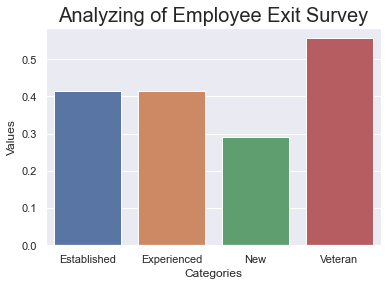

In [108]:
ax = sns.barplot(x = analysis.index, y = analysis["dissatisfied"])
plt.title("Analyzing of Employee Exit Survey", fontsize = 20)
ax.set(xlabel='Categories',ylabel='Values')
plt.show()